In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Pod_Fault_Data_CSV/PF_Memory_Cluster_Vs_Node-Frontend.csv')
df.head(10)

Mem_Cluster  Mem_Node_Frontend
0     47263744           43012096
1     52129792           43012096
2     52129792           48111616
3     57536512           52936704
4    124039168           70045696
5    175894528          173830144
6    176029696          180408320
7    175800320          180125696
8    102019072          180228096
9     62164992           60502016

In [3]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['Mem_Cluster','Mem_Node_Frontend'])

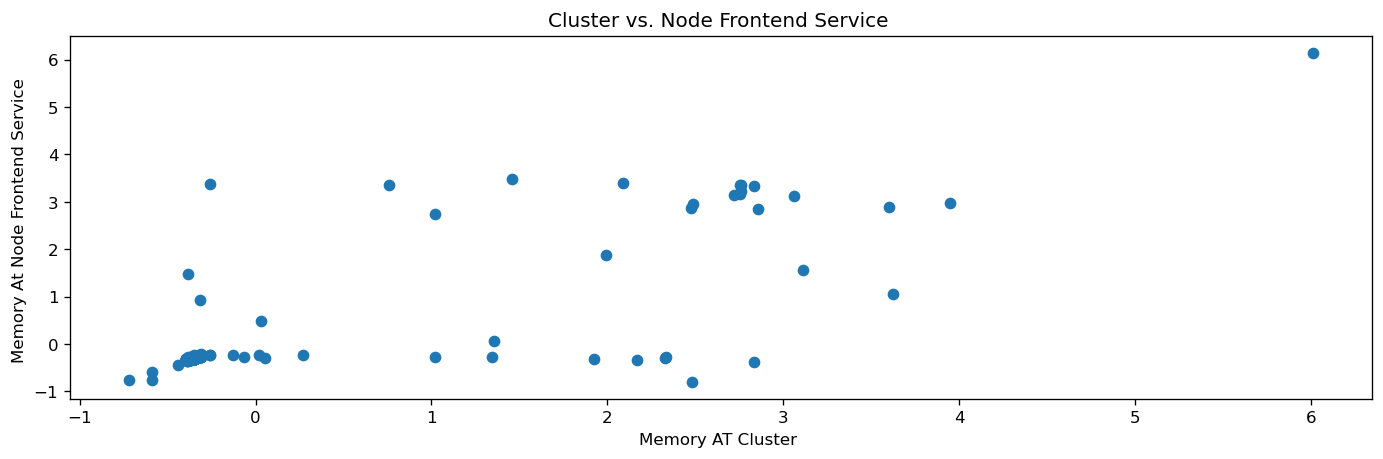

In [4]:
plt.figure(figsize=(14,4))
plt.scatter(df.Mem_Cluster, df.Mem_Node_Frontend)
plt.xlabel('Memory AT Cluster ')
plt.ylabel('Memory At Node Frontend Service ')
plt.title('Cluster vs. Node Frontend Service ')
plt.show()

In [6]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

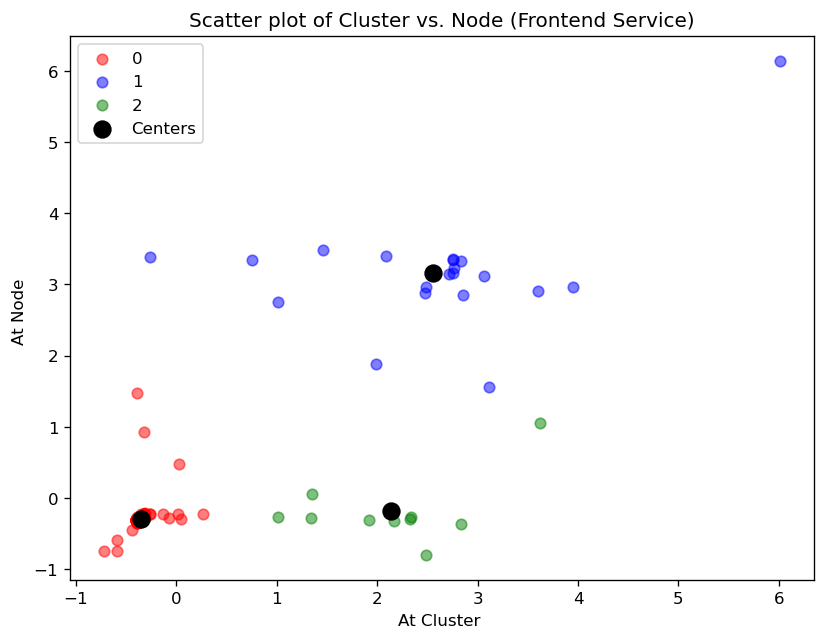

In [7]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Mem_Cluster, df[model.labels_==i].Mem_Node_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("At Node ")
plt.title('Scatter plot of Cluster vs. Node (Frontend Service)')
plt.legend()
plt.show()

In [8]:
def distance_from_center(Mem_Cluster, Mem_Node_Frontend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Cluster Memory Usage: the standardized Memory Usage of the data point 
    :param float Node Memory Usage: the standardized Memory at Node of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Cluster_Mem =  model.cluster_centers_[label,0]
    Node_Mem_Frontend =  model.cluster_centers_[label,1]
    distance = np.sqrt((Mem_Cluster - Cluster_Mem) ** 2 + (Mem_Node_Frontend - Node_Mem_Frontend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.Mem_Cluster, df.Mem_Node_Frontend, df.label)

In [9]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     Mem_Cluster  Mem_Node_Frontend  label  distance
8       0.759903           3.348825      1      1.81
45      1.990349           1.885836      1      1.40
56     -0.387017           1.470198      0      1.76
59     -0.259458           3.383431      1      2.83
66      3.622499           1.050279      2      1.93
67      6.011592           6.143961      1      4.56
209    -0.317429           0.925796      0      1.22
216     3.114147           1.556896      1      1.70
232     3.950301           2.968893      1      1.40
233     1.018339           2.745972      1      1.60


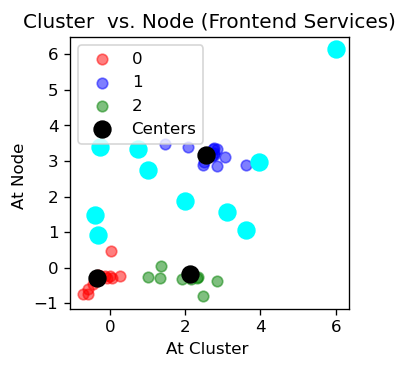

In [25]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Mem_Cluster, df[model.labels_==i].Mem_Node_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Mem_Cluster, outliers.Mem_Node_Frontend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("At Node ")
plt.title('Cluster  vs. Node (Frontend Services)')
plt.legend()
plt.show()